## Loading Dataset

In [1]:
import pandas as pd
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## EDA

In [2]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
cat_features = data.select_dtypes(include=['object']).columns
num_features = data.select_dtypes(exclude=['object']).columns
print('Categorical features: ', cat_features)
print('Numerical features: ', num_features)

Categorical features:  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
Numerical features:  Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

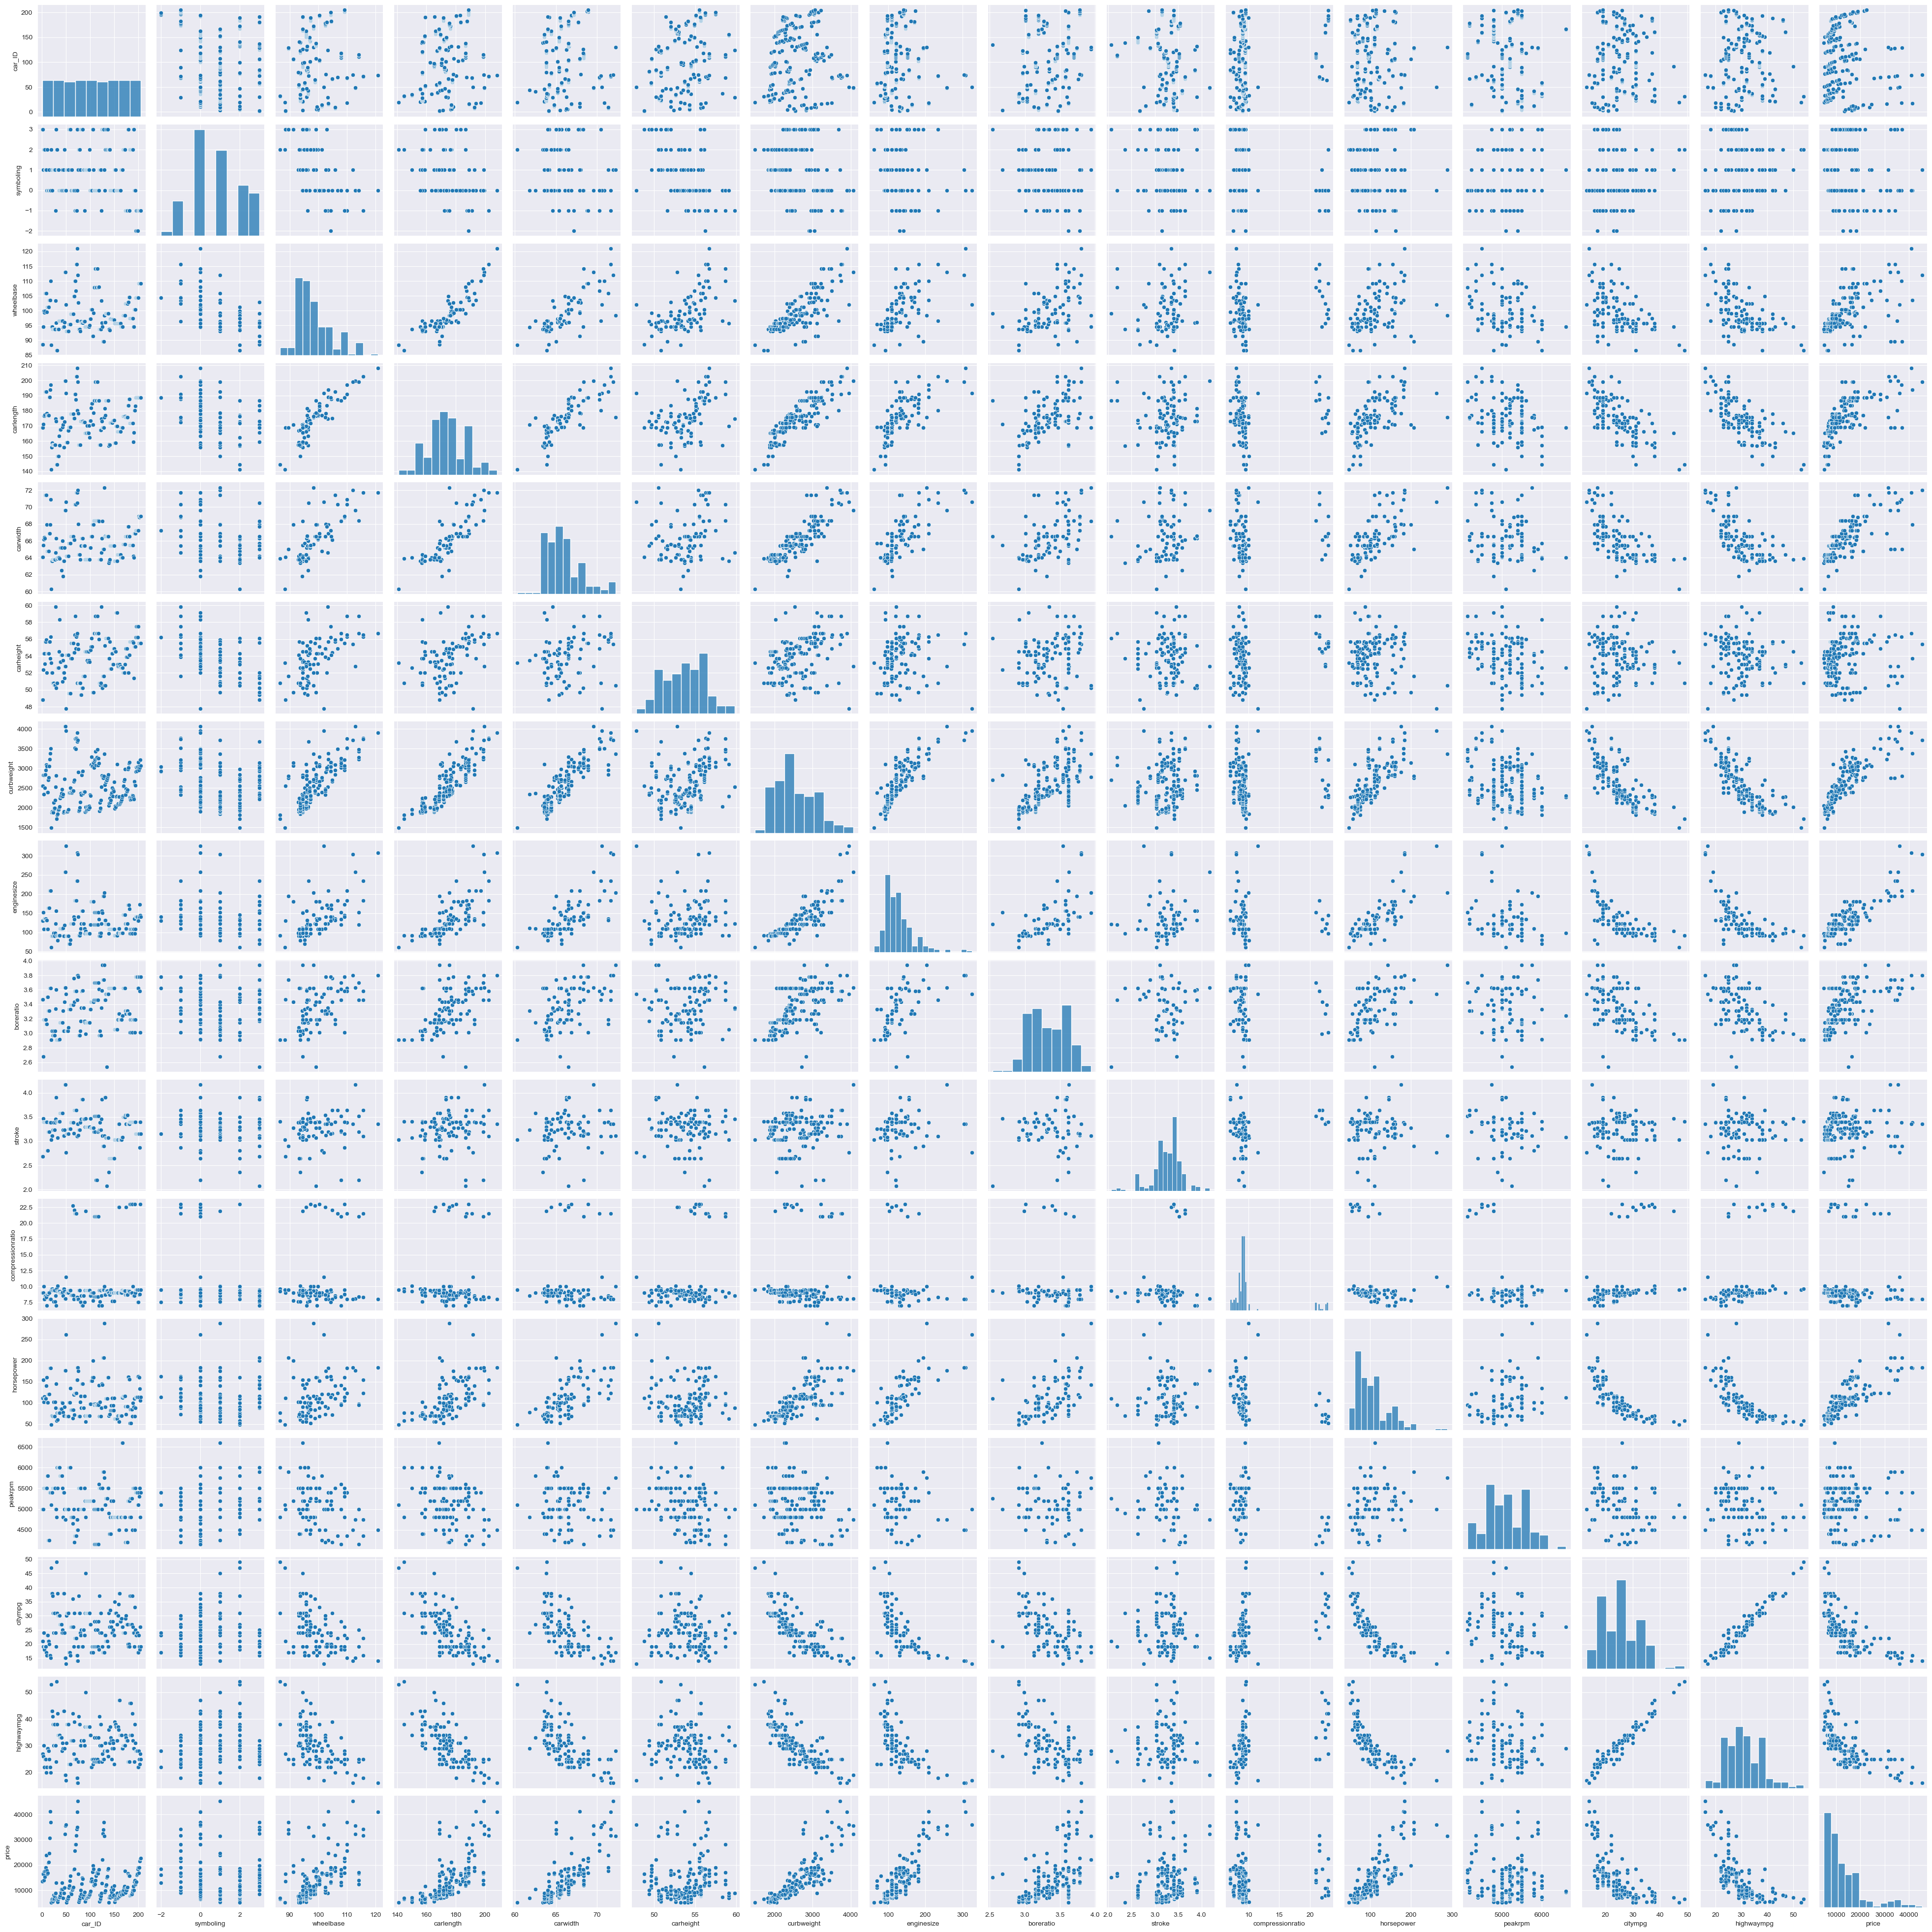

In [ ]:
sns.pairplot(data[num_features])

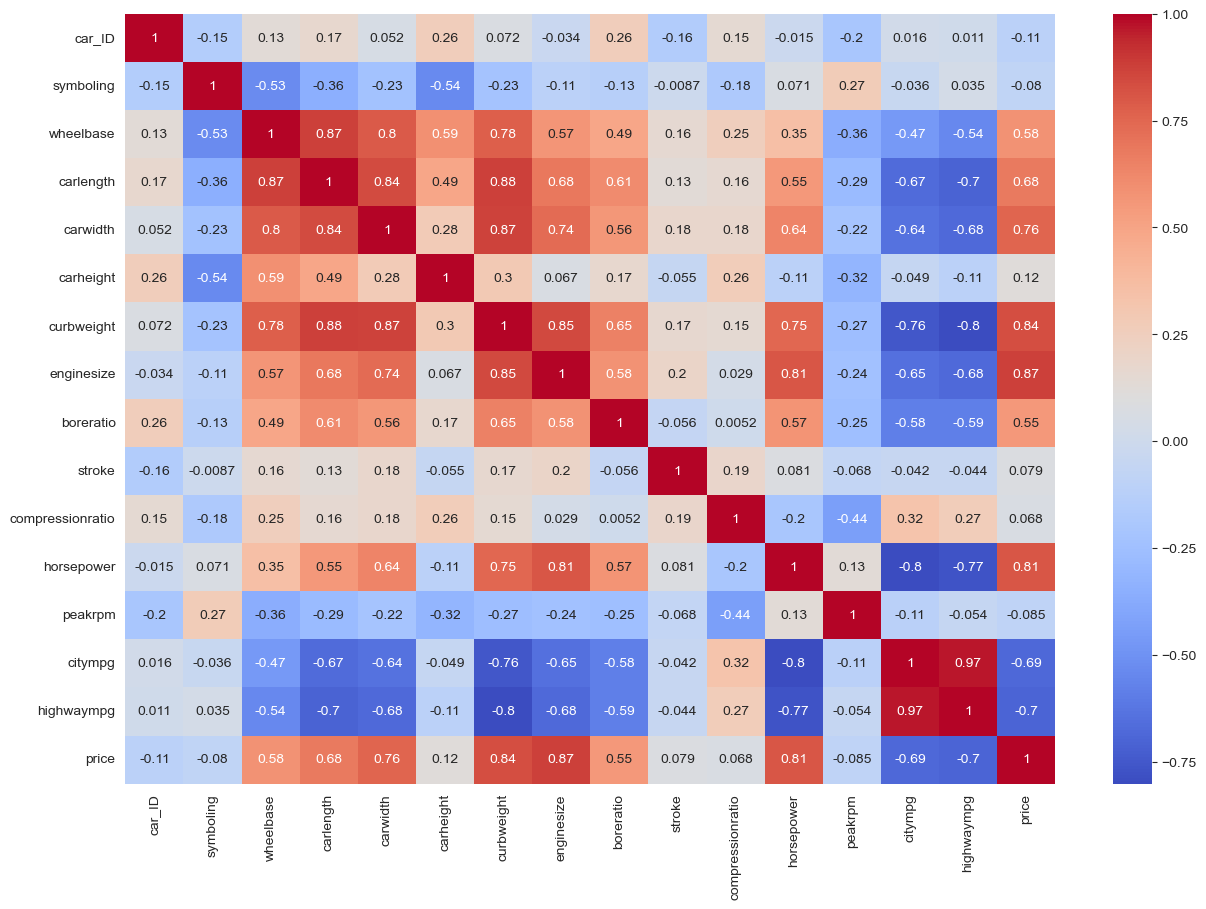

In [9]:
# correlation heatmap for numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(data[num_features].corr(), annot=True, cmap='coolwarm')
plt.show()


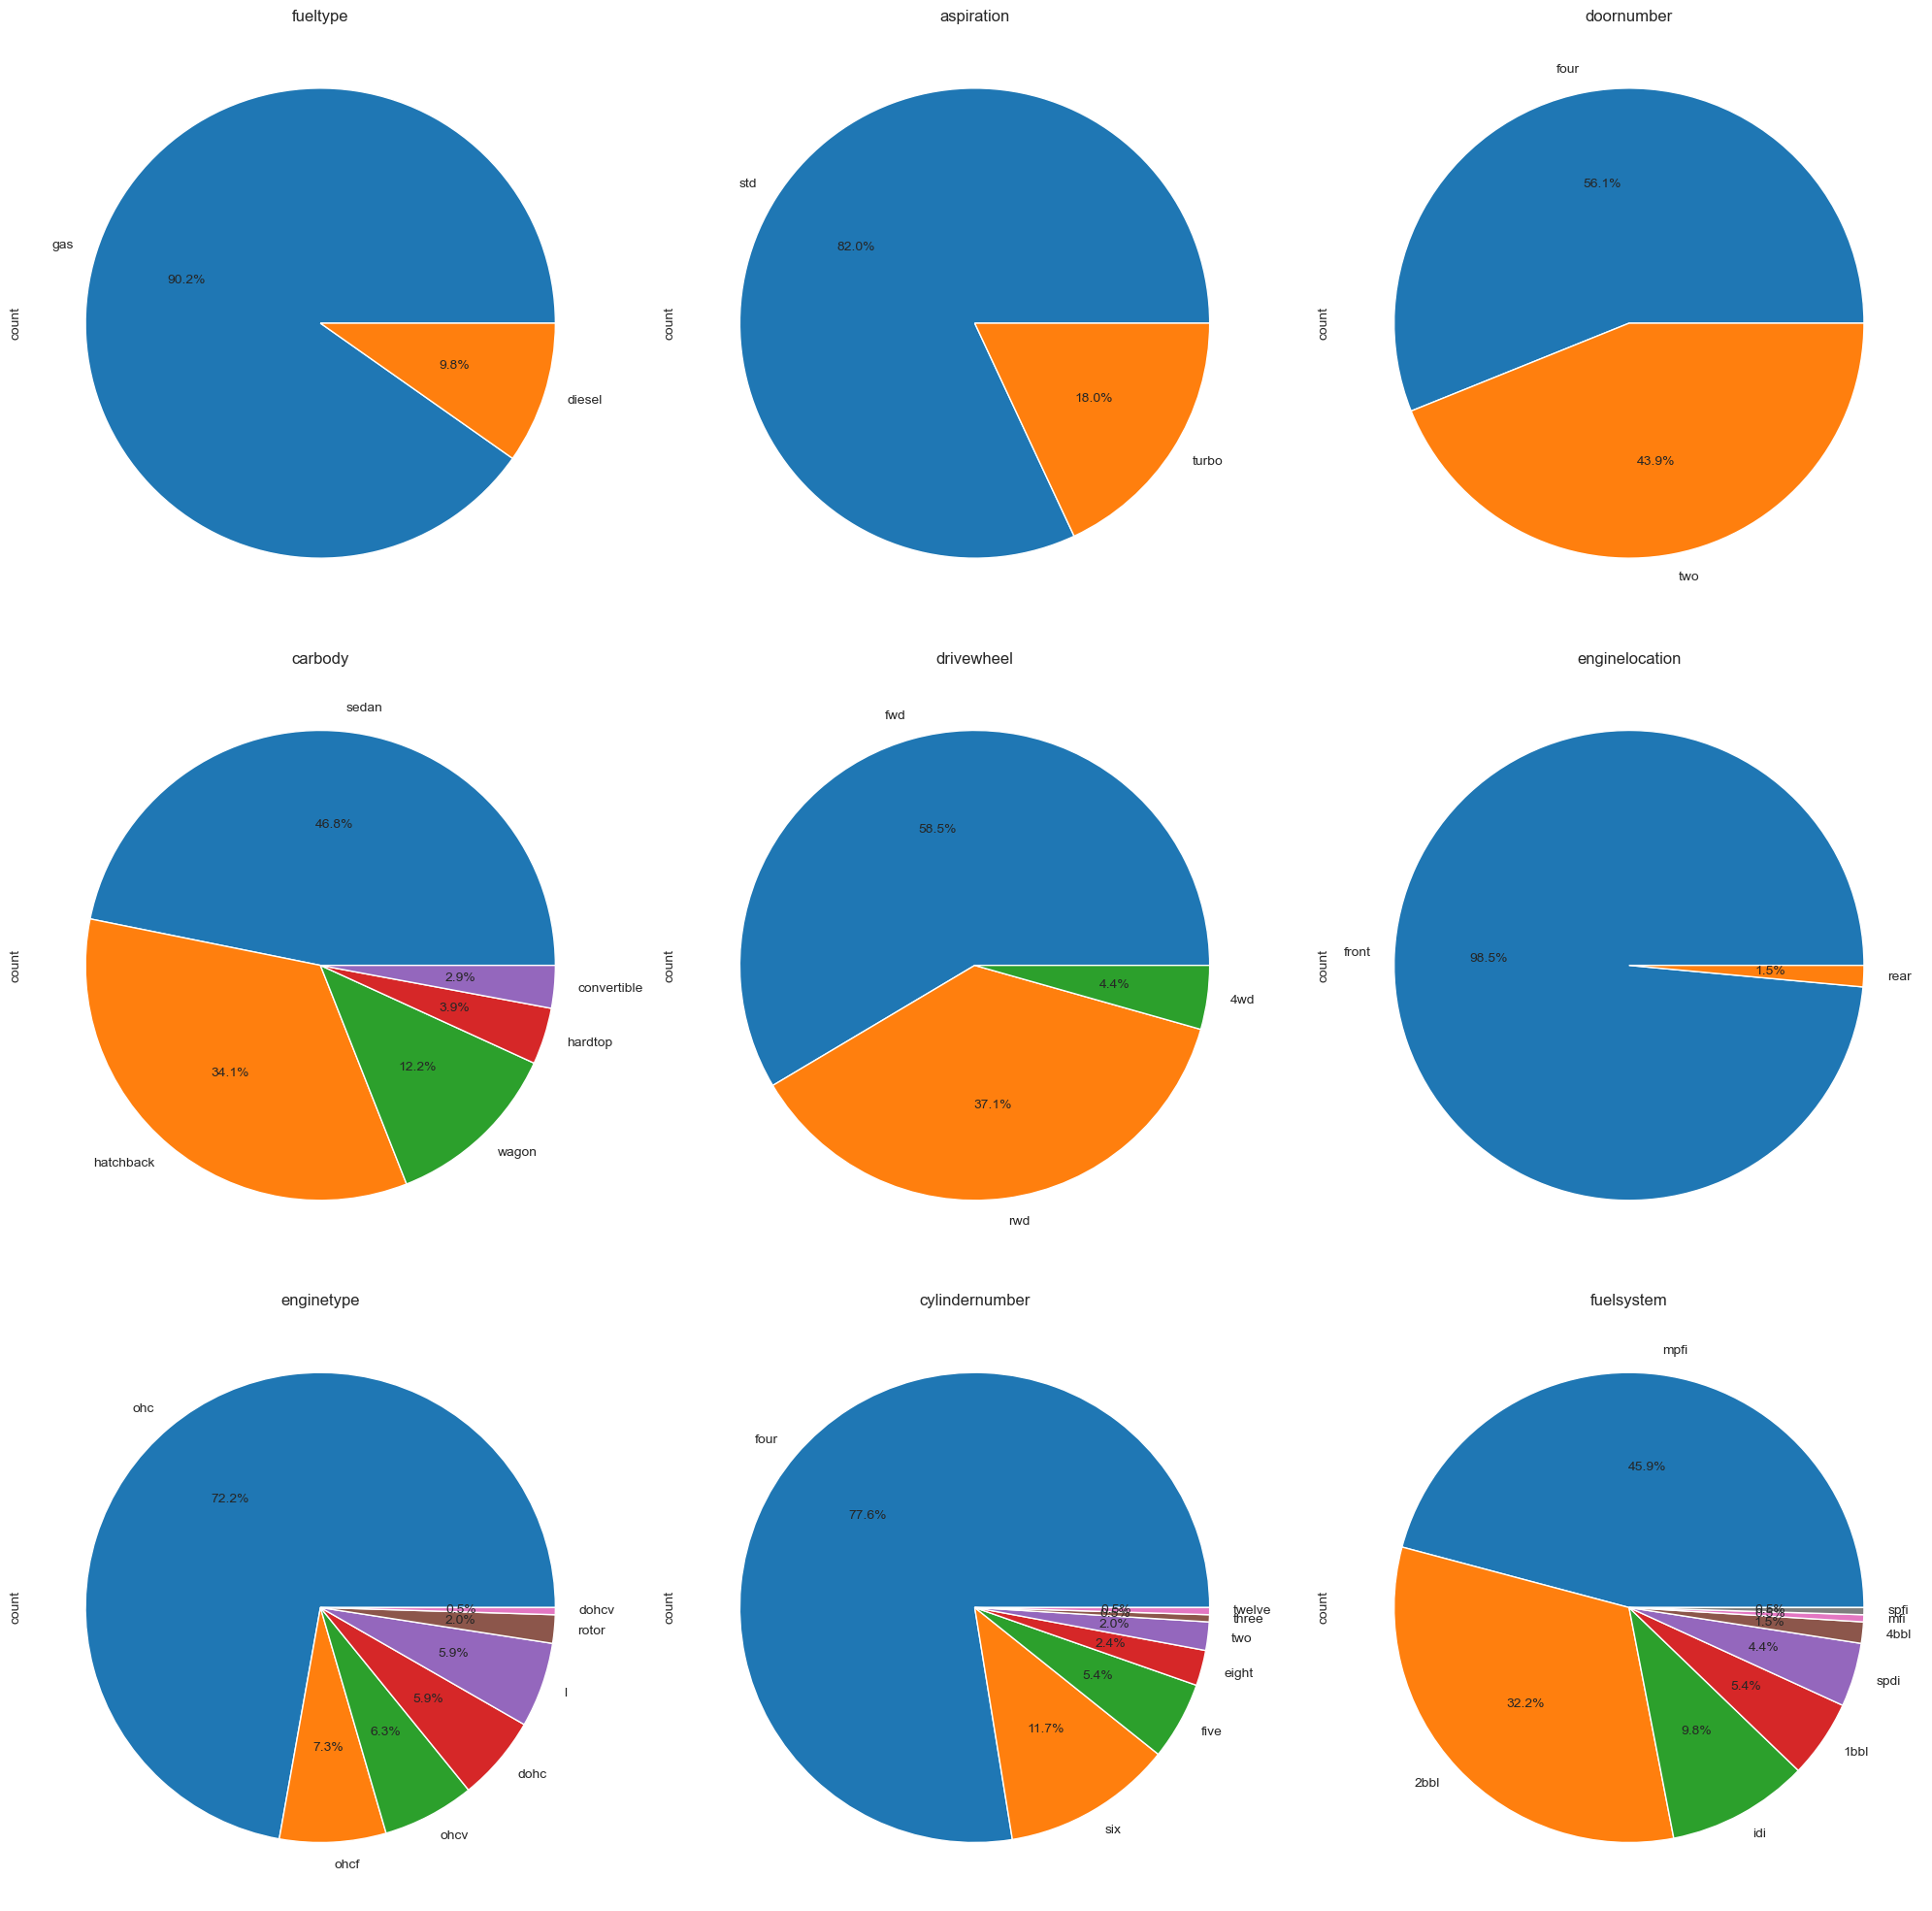

In [10]:
#plot pie charts for categorical features in  one figure except CarName
plt.figure(figsize=(20, 20))
cat_features_to_plot = cat_features.drop('CarName')
# Adjust the grid size based on the number of categorical features
n_features = len(cat_features_to_plot)
rows = (n_features + 2) // 3  # Calculate the required number of rows

for i, col in enumerate(cat_features_to_plot):
    plt.subplot(rows, 3, i+1)
    data[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



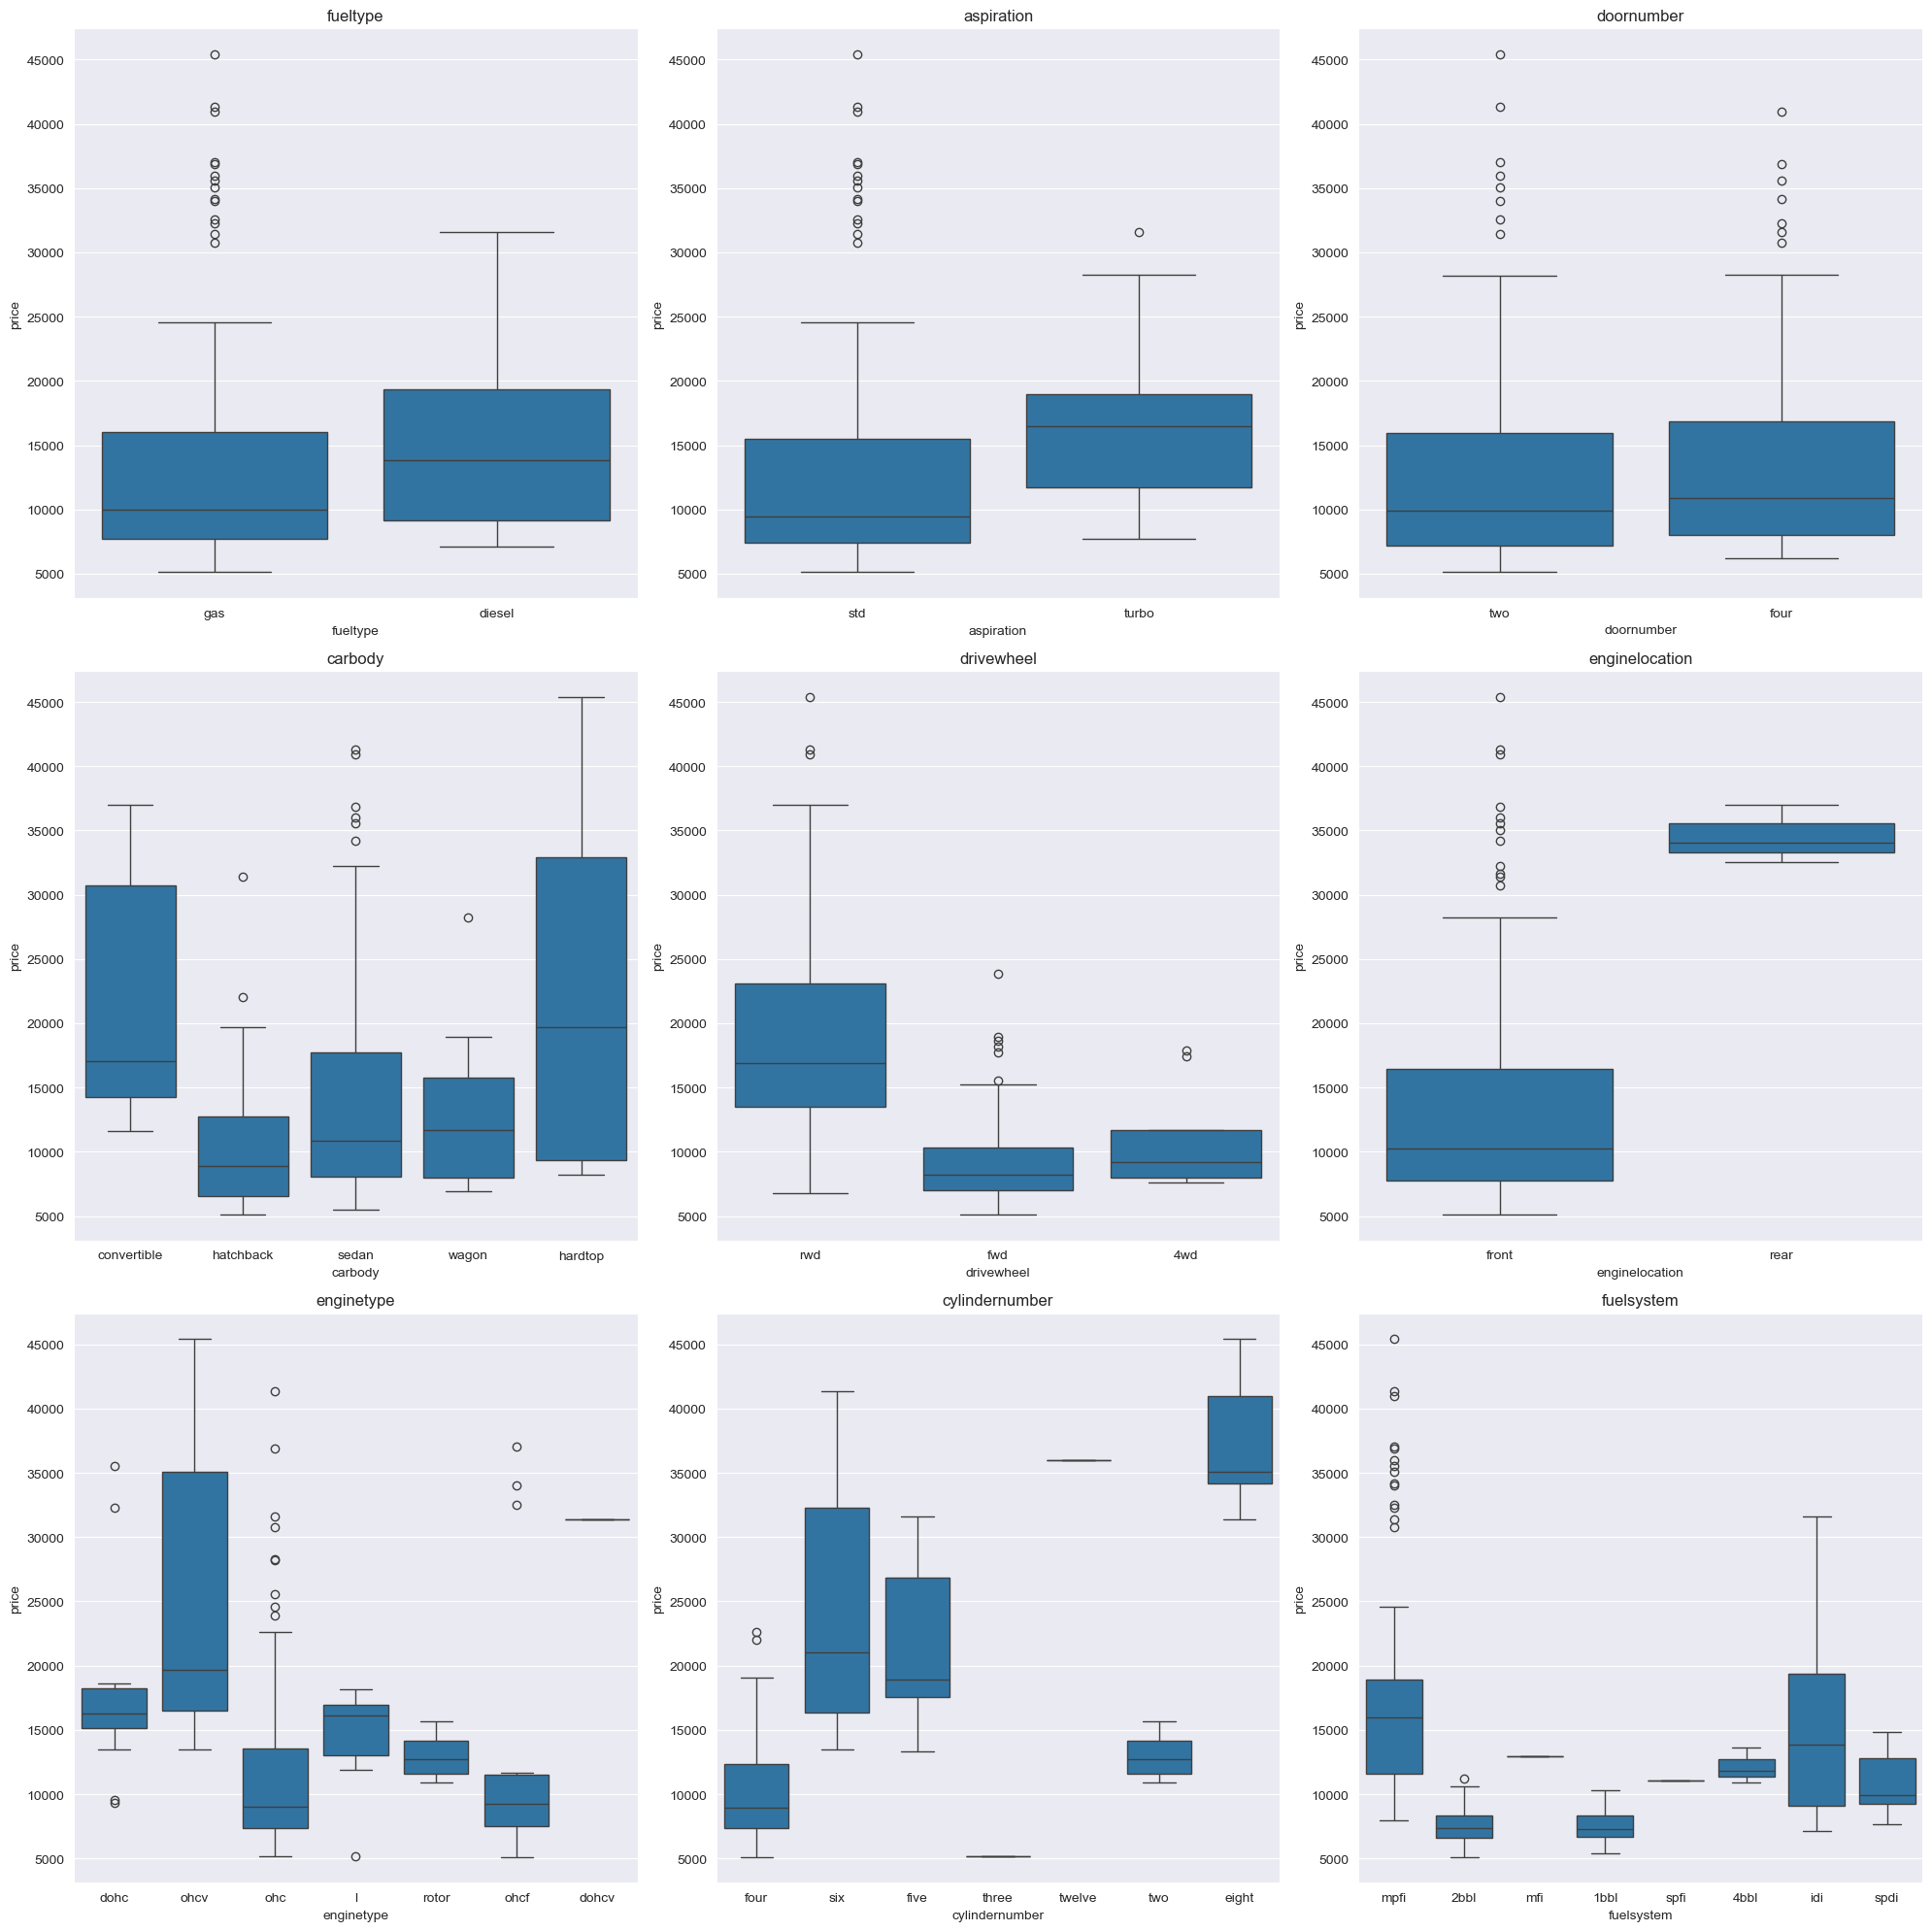

In [11]:
# plot the distribution of price with respect to each categorical feature
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_features_to_plot):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(x=col, y='price', data=data)
    plt.title(col)
plt.tight_layout()
plt.show()

## Data Pre-Processing

In [12]:
# split the CarName column into two columns: company and model
data['company'] = data['CarName'].apply(lambda x: x.split(' ')[0])
data['model'] = data['CarName'].apply(lambda x: x.split(' ')[1] if len(x.split(' ')) > 1 else None)
data.drop('CarName', axis=1, inplace=True)

In [13]:
data['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
mapping = { 'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}
data['company'] = data['company'].replace(mapping)
data['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
# grroup the car companies the value counts of its models
data[['company', 'model']].groupby('company',observed=False).value_counts()

company      model       
alfa-romero  Quadrifoglio    1
             giulia          1
             stelvio         1
audi         100ls           2
             100             1
                            ..
volvo        244dl           2
             264gl           2
             245             1
             246             1
             diesel          1
Name: count, Length: 114, dtype: int64

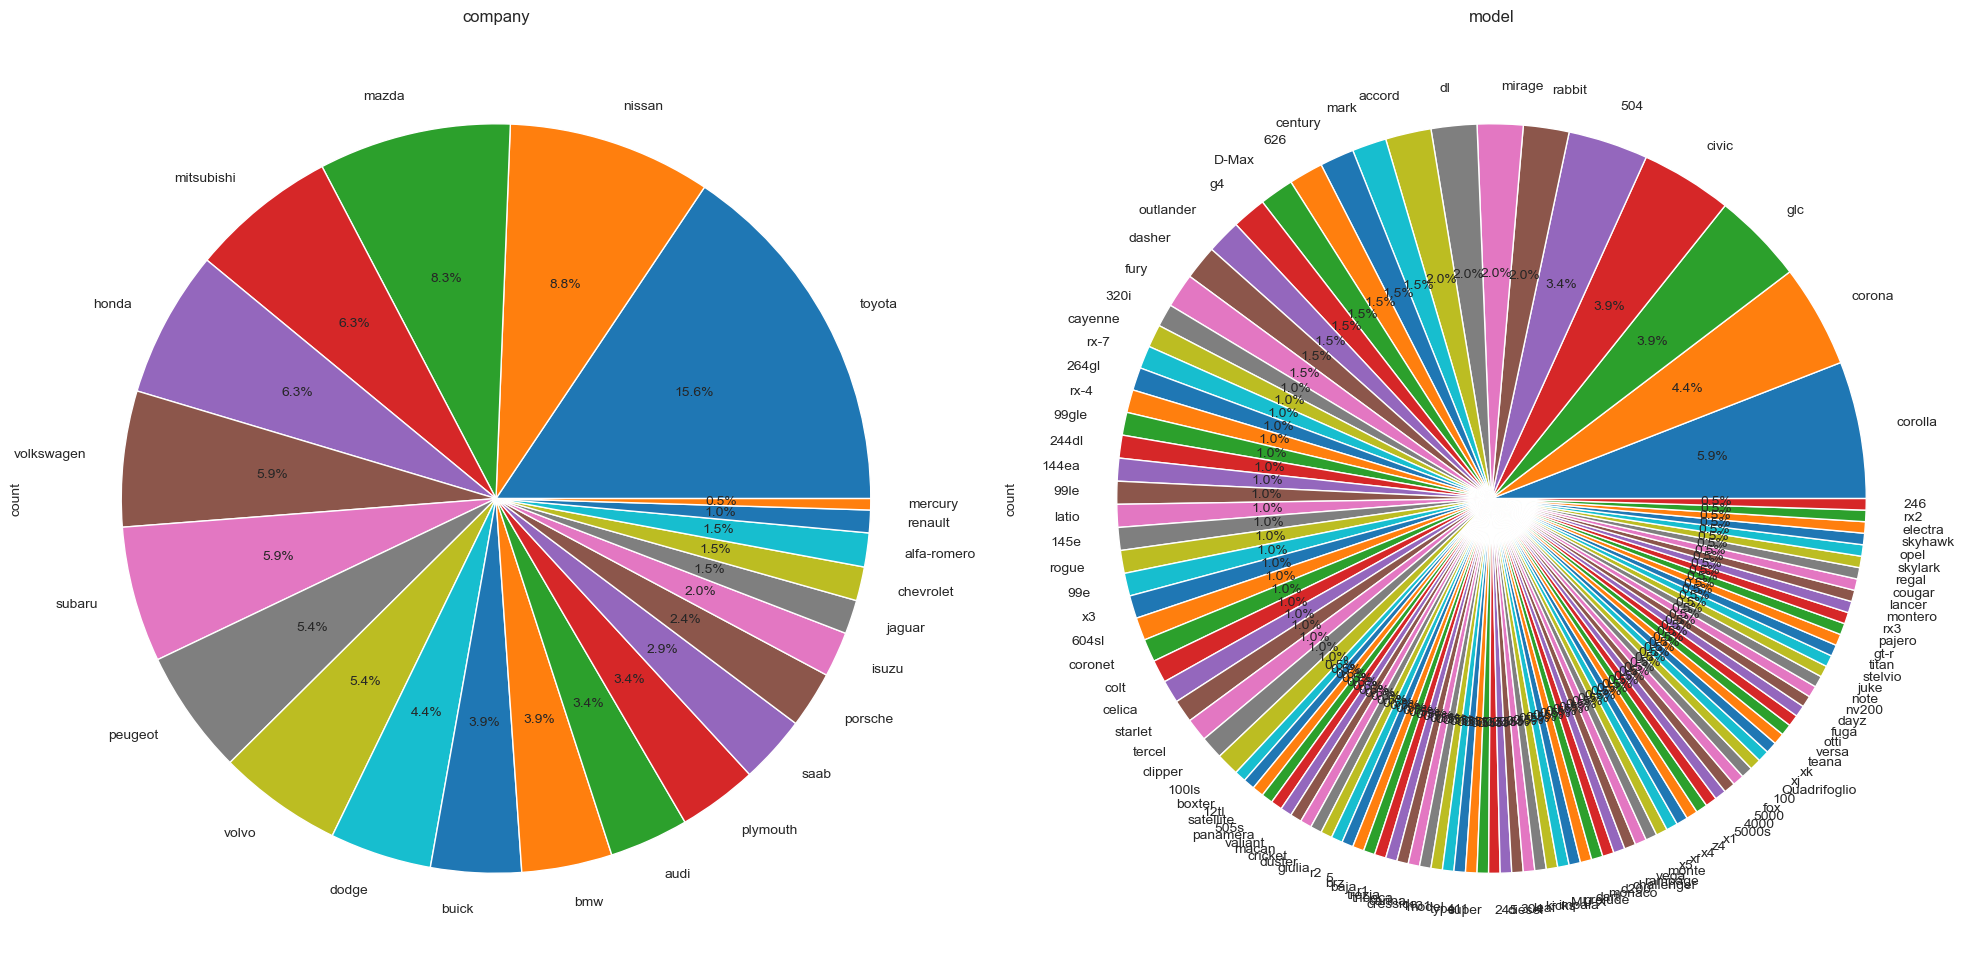

In [16]:
# plot pie charts for company and model
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
data['company'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('company')
plt.subplot(1, 2, 2)
data['model'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('model')
plt.tight_layout()
plt.show()

In [17]:
# drop the Car ID column
data.drop('car_ID', axis=1, inplace=True)

## Encoding Features

In [18]:
# encoding door number and cylinder number with ordinal encoding
door_mapping = {'two': 2,  'four': 4}
data['doornumber'] = data['doornumber'].map(door_mapping)
cylinder_mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
data['cylindernumber'] = data['cylindernumber'].map(cylinder_mapping)

In [19]:
cat_features = data.select_dtypes(include=['object']).columns
cat_features

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'company', 'model'],
      dtype='object')

In [20]:
# one hot encoding for the rest of the categorical features
data = pd.get_dummies(data, columns=cat_features, drop_first=True).astype('float64')
data.head()


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,model_vega,model_versa,model_x1,model_x3,model_x4,model_x5,model_xf,model_xj,model_xk,model_z4
0,3.0,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,4.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,4.0,99.4,176.6,66.4,54.3,2824.0,5.0,136.0,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Correlation with the target

In [21]:
# getting the absolute correlation of the features with respect to the target
correlation = data.corr()
corr_table=correlation['price'].abs().sort_values(ascending=False)
corr_table.drop('price', inplace=True)

In [59]:
X = data.drop('price', axis=1)
y = data['price']

In [23]:
corr_table.head()

enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
cylindernumber    0.718305
Name: price, dtype: float64

## P-Value of the Features

In [101]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
segnificant_features = est2.pvalues[est2.pvalues < 0.05].index
print(segnificant_features)

Index(['doornumber', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'stroke', 'compressionratio', 'peakrpm', 'fueltype_gas',
       'aspiration_turbo', 'enginelocation_rear', 'enginetype_l',
       'company_bmw', 'company_buick', 'company_dodge', 'company_isuzu',
       'company_jaguar', 'company_mitsubishi', 'company_peugeot',
       'company_plymouth', 'company_porsche', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'model_100ls', 'model_144ea',
       'model_145e', 'model_304', 'model_320i', 'model_99le', 'model_MU-X',
       'model_boxter', 'model_carina', 'model_cayenne', 'model_dayz',
       'model_electra', 'model_impala', 'model_macan', 'model_montero',
       'model_regal', 'model_vega', 'model_x5', 'model_xj', 'model_xk'],
      dtype='object')


## Data Normalization

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

## Data Splitting

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [67]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error
import numpy as np

def model(params, X,bias=False):
    if bias:
        X = np.c_[np.ones(X.shape[0]), X]
    return X.dot(params)

def loss(params, X, y):
    predictions = model(params, X)
    return mean_squared_error(y, predictions)


def gradient_descent(X_train, y_train, initial_params=None, learning_rate=0.01, epochs=100,X_val=None, y_val=None,bias=True):
    if bias:
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]
        X_val = np.c_[np.ones(X_val.shape[0]), X_val] if X_val is not None else None
    
    params = np.random.randn(X_train.shape[1]) if initial_params is None else initial_params
    
    train_loss_history = []
    val_loss_history = []
    
    for epoch in range(epochs):
        # Calculate gradient
        predictions = model(params, X_train)
        gradients =  X_train.T.dot(predictions - y_train) / len(y_train)

        # Update parameters
        params -= learning_rate * gradients

        # Calculate and store losses
        train_loss = loss(params, X_train, y_train)
        val_loss = loss(params, X_val, y_val) if X_val is not None else None
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss) if X_val is not None else None

        print(f'Epoch {epoch + 1}, Train Loss: {train_loss}, Validation Loss: {val_loss}') if X_val is not None else print(f'Epoch {epoch + 1}, Train Loss: {train_loss}')

    return params, train_loss_history, val_loss_history if X_val is not None else None

# Run the gradient descent


## Training the Model

Epoch 1, Train Loss: 225291981.26696515, Validation Loss: 218731776.45769116
Epoch 2, Train Loss: 212629874.22247836, Validation Loss: 203631822.63126743
Epoch 3, Train Loss: 201914557.60815874, Validation Loss: 190769225.17827713
Epoch 4, Train Loss: 192746927.58268896, Validation Loss: 179721650.11267975
Epoch 5, Train Loss: 184813252.90556958, Validation Loss: 170151923.10604587
Epoch 6, Train Loss: 177866768.16799778, Validation Loss: 161790355.24174267
Epoch 7, Train Loss: 171713245.2068142, Validation Loss: 154420797.73006594
Epoch 8, Train Loss: 166199682.04583368, Validation Loss: 147869631.00284877
Epoch 9, Train Loss: 161205434.9951155, Validation Loss: 141997063.941109
Epoch 10, Train Loss: 156635265.49433854, Validation Loss: 136690252.67499232
Epoch 11, Train Loss: 152413887.6439986, Validation Loss: 131857853.33500026
Epoch 12, Train Loss: 148481691.96926397, Validation Loss: 127425705.52384824
Epoch 13, Train Loss: 144791391.16618913, Validation Loss: 123333407.97804421


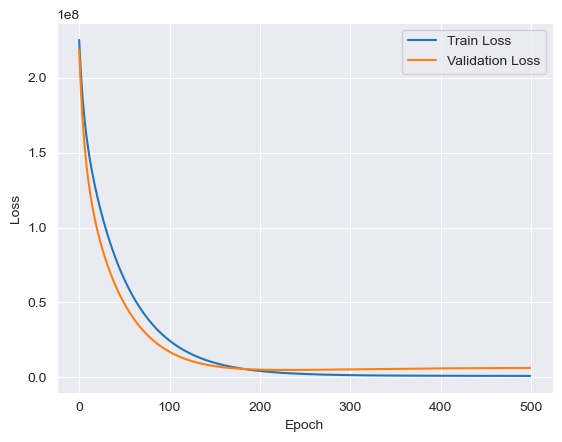

In [72]:
final_params, train_loss_history, val_loss_history = gradient_descent(
    X_train, y_train, learning_rate=0.01, epochs=500, X_val=X_test, y_val=y_test
)
# Plotting the history
import matplotlib.pyplot as plt

plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [70]:
# Predicting the test set
y_pred = model(final_params, X_test,bias=True)
test=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test.head()

,Actual,Predicted
131,9895.0,8849.434745
117,18150.0,15993.341916
63,10795.0,10468.328096
56,11845.0,10480.139503
49,36000.0,37901.803336


In [71]:
root_mean_squared_error(y_test, y_pred)

2257.843194862849

## Selecting Features with High Correlations

In [75]:
selected_features = corr_table[corr_table > 0.3].index
selected_features

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber',
       'highwaympg', 'citympg', 'carlength', 'drivewheel_rwd',
       'drivewheel_fwd', 'wheelbase', 'boreratio', 'fuelsystem_mpfi',
       'company_buick', 'fuelsystem_2bbl', 'enginetype_ohcv',
       'company_porsche', 'enginetype_ohc', 'company_jaguar',
       'enginelocation_rear', 'company_bmw'],
      dtype='object')

In [76]:
X_selected= data[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.15, random_state=42)
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Epoch 1, Train Loss: 220635710.35230416, Validation Loss: 265442904.75230762
Epoch 2, Train Loss: 210280283.78495675, Validation Loss: 252565909.5228226
Epoch 3, Train Loss: 201201625.50998908, Validation Loss: 241350843.10045335
Epoch 4, Train Loss: 193184123.09837836, Validation Loss: 231514271.00419268
Epoch 5, Train Loss: 186050278.74053636, Validation Loss: 222822955.33628064
Epoch 6, Train Loss: 179653934.3869762, Validation Loss: 215084926.55806848
Epoch 7, Train Loss: 173874701.92519546, Validation Loss: 208142144.06527165
Epoch 8, Train Loss: 168613384.0356665, Validation Loss: 201864462.82412437
Epoch 9, Train Loss: 163788209.50109062, Validation Loss: 196144673.64289677
Epoch 10, Train Loss: 159331738.09128308, Validation Loss: 190894426.01363605
Epoch 11, Train Loss: 155188315.91782618, Validation Loss: 186040876.45972985
Epoch 12, Train Loss: 151311983.33993465, Validation Loss: 181523933.2754706
Epoch 13, Train Loss: 147664754.92133898, Validation Loss: 177293991.52071315

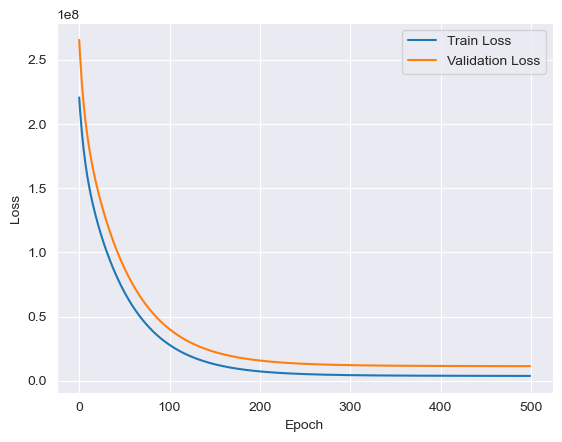

In [78]:
final_params, train_loss_history, val_loss_history = gradient_descent(
    X_train, y_train, learning_rate=0.01, epochs=500, X_val=X_test, y_val=y_test
)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
y_pred = model(final_params, X_test,bias=True)
root_mean_squared_error(y_test, y_pred)

3388.6781974635555